## Importando bibliotecas

In [241]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
%matplotlib inline

## Carregando o dataset

In [249]:
data = pd.read_csv("dataset.csv")
data_informacoes_gerais = data.drop(data.columns[[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]], axis=1)
y = data["Q11"]
X = data_informacoes_gerais

data.shape

(5820, 33)

## Estimando o valor do parametro K - Método Elbow

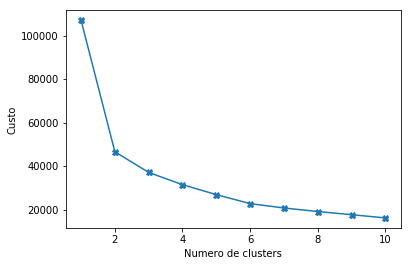

In [243]:
custo = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(X)
    custo.append((i, kmeans.inertia_))
    
plt.xlabel("Numero de clusters")
plt.ylabel("Custo")
plt.plot([w[0] for w in custo], [w[1] for w in custo], marker="X")

## Exibição dos classes em diferentes clusters

Text(0.5, 1.0, 'Gastos por cluster')

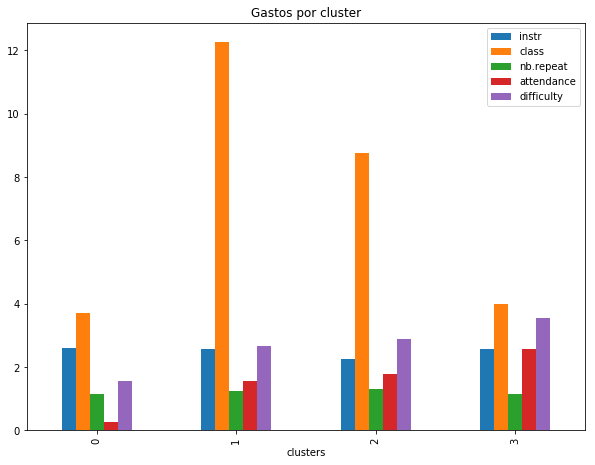

In [244]:
data_array = X.values

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
data_informacoes_gerais["clusters"] = kmeans.fit_predict(data_array)

data_informacoes_gerais.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")

# Valores dos centroides

In [212]:
kmeans.cluster_centers_

array([[ 2.60998152,  3.69963031,  1.14325323,  0.25046211,  1.55914972],
       [ 2.57320644, 12.261347  ,  1.25036603,  1.56734993,  2.67203514],
       [ 2.25556858,  8.75029308,  1.29777257,  1.79660023,  2.8898007 ],
       [ 2.56842737,  4.00240096,  1.14465786,  2.56602641,  3.56122449]])

## Tabela de distância

In [213]:
distancia = kmeans.fit_transform(data_informacoes_gerais)
distancia[0]

array([10.63263751,  3.39437572,  4.71884683,  7.46270008])

## Visualizando dados de uma instancia

<IPython.core.display.Javascript object>


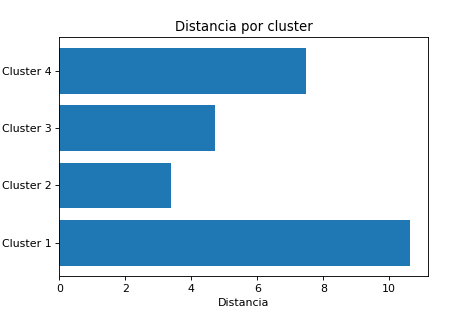

In [217]:
%matplotlib notebook
eixo_x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
plt.barh(eixo_x, distancia[0])
plt.xlabel('Distancia')
plt.title('Distancia por cluster')
plt.show()

# Mostrando Rótulos

In [215]:
labels = kmeans.labels_
labels

array([1, 1, 2, ..., 0, 0, 0])

## Visualizando dos centroides

<IPython.core.display.Javascript object>


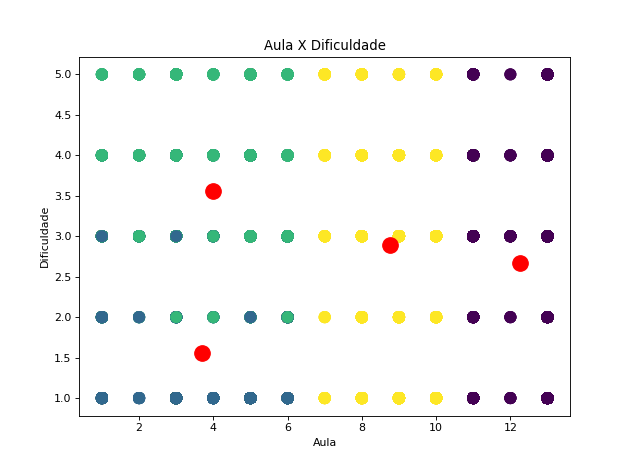

In [218]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['class'], X['difficulty'], s=100, c= kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,4], s=200, c='red', label='Centroids')
plt.title('Aula X Dificuldade')
plt.xlabel('Aula')
plt.ylabel('Dificuldade')
plt.show()

## Visualizando resultados

<IPython.core.display.Javascript object>


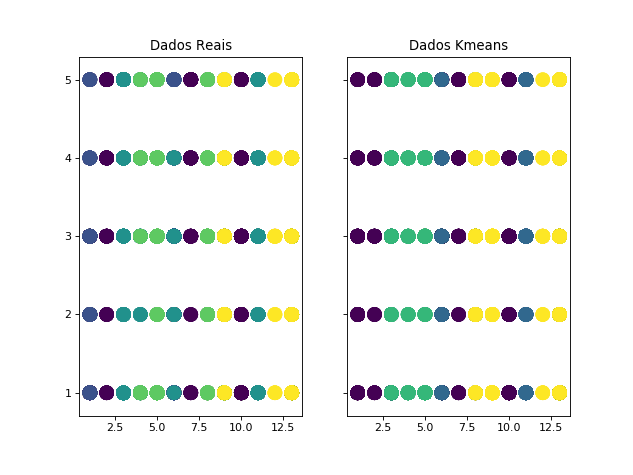

In [247]:
%matplotlib notebook
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Dados Reais')
ax1.scatter(X['class'], X['difficulty'],s=150, c=sorted(y))
ax2.set_title('Dados Kmeans')
ax2.scatter(X['class'], X['difficulty'],s=150, c=sorted(labels))

## Matriz de confusao

In [237]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
data_informacoes_gerais["clusters"] = kmeans.fit_predict(X)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
#X.head(10)

In [232]:
print(pd.crosstab(y, labels, rownames=['Dados Reais'], colnames=['Dados Predito / Gostou da aula'], margins=True))

Dados Predito / Gostou da aula     0     1     2     3   All
Dados Reais                                                 
1                                288   221   204   204   917
2                                160   151   201   166   678
3                                389   313   503   455  1660
4                                316   241   476   515  1548
5                                213   156   282   366  1017
All                             1366  1082  1666  1706  5820


## Métricas de classificação

In [240]:
from sklearn import metrics
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
print(metrics.classification_report(y, labels, target_names=clusters))

              precision    recall  f1-score   support

   Cluster 1       0.00      0.00      0.00         0
   Cluster 2       0.20      0.24      0.22       917
   Cluster 3       0.12      0.30      0.17       678
   Cluster 4       0.27      0.27      0.27      1660
   Cluster 5       0.00      0.00      0.00      1548
   Cluster 6       0.00      0.00      0.00      1017

   micro avg       0.15      0.15      0.15      5820
   macro avg       0.10      0.14      0.11      5820
weighted avg       0.12      0.15      0.13      5820

